In [14]:

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("epa-sea-level.csv")

df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


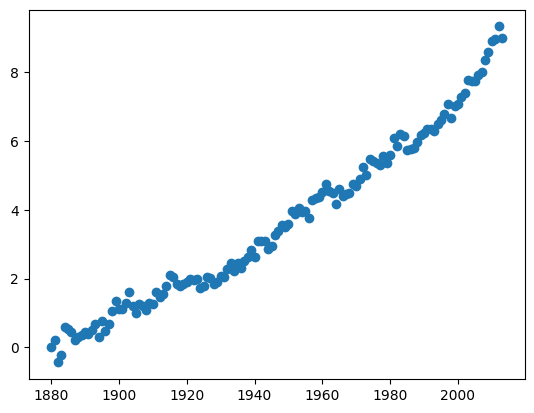

In [15]:
x = df["Year"]
y = df["CSIRO Adjusted Sea Level"]

plt.scatter(x,y)
plt.show()

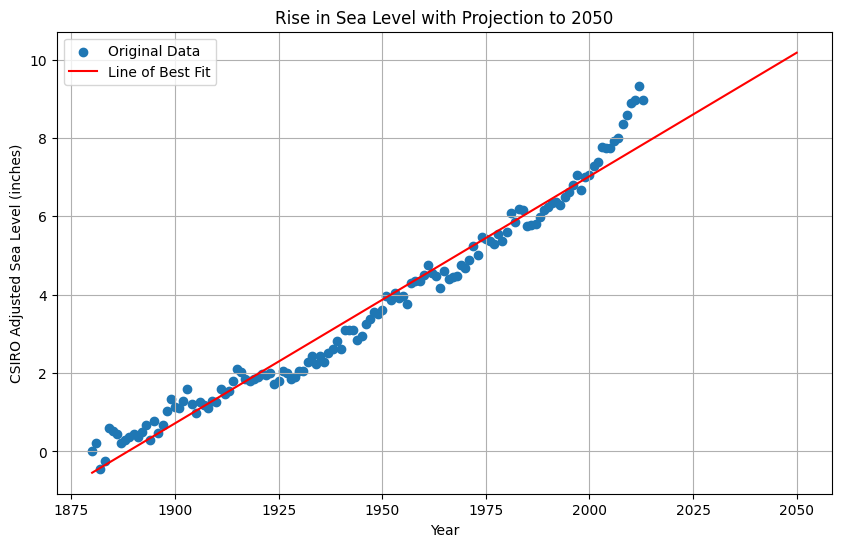

Predicted sea level in 2050: 10.18 inches


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd


x = df["Year"]
y = df["CSIRO Adjusted Sea Level"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

# Create extended years up to 2050
x_extended = pd.Series(range(int(x.min()), 2051))
y_extended = slope * x_extended + intercept

# Plot
plt.figure(figsize=(10,6))
plt.scatter(x, y, label="Original Data")
plt.plot(x_extended, y_extended, color='red', label="Line of Best Fit")

plt.title("Rise in Sea Level with Projection to 2050")
plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level (inches)")
plt.legend()
plt.grid(True)
plt.show()

# Predict sea level in 2050
sea_level_2050 = slope * 2050 + intercept
print(f"Predicted sea level in 2050: {sea_level_2050:.2f} inches")



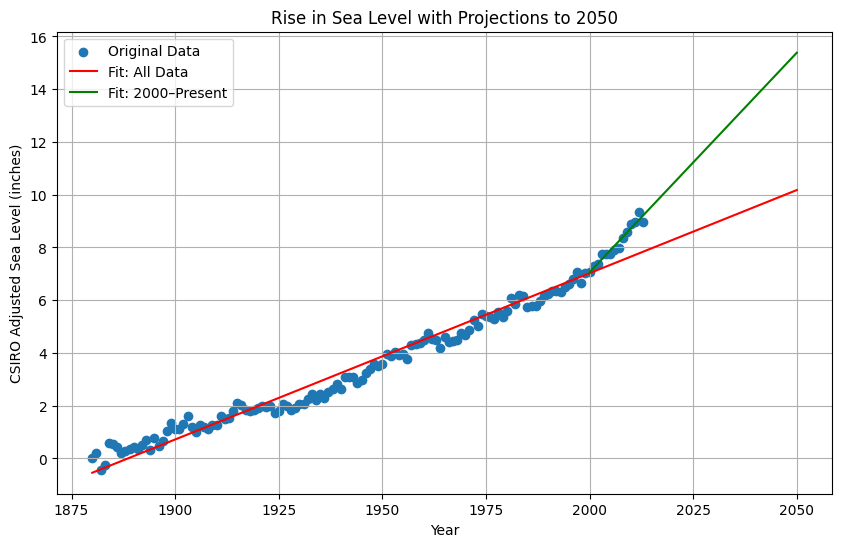

Predicted sea level in 2050 (all data): 10.18 inches
Predicted sea level in 2050 (since 2000): 15.38 inches


In [13]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Assuming df is already loaded
x = df["Year"]
y = df["CSIRO Adjusted Sea Level"]

# --- Line of best fit using all data ---
slope_all, intercept_all, r_all, p_all, std_err_all = stats.linregress(x, y)

# Extend line to 2050
x_extended = pd.Series(range(int(x.min()), 2051))
y_extended = slope_all * x_extended + intercept_all

# --- Line of best fit using data from year 2000 onwards ---
df_recent = df[df["Year"] >= 2000]
x_recent = df_recent["Year"]
y_recent = df_recent["CSIRO Adjusted Sea Level"]

slope_recent, intercept_recent, r_recent, p_recent, std_err_recent = stats.linregress(x_recent, y_recent)

# Extend recent line to 2050
x_recent_extended = pd.Series(range(2000, 2051))
y_recent_extended = slope_recent * x_recent_extended + intercept_recent

# --- Plot both ---
plt.figure(figsize=(10,6))
plt.scatter(x, y, label="Original Data")

# Plot both lines of best fit
plt.plot(x_extended, y_extended, color='red', label="Fit: All Data")
plt.plot(x_recent_extended, y_recent_extended, color='green', label="Fit: 2000–Present")

plt.title("Rise in Sea Level with Projections to 2050")
plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level (inches)")
plt.legend()
plt.grid(True)
plt.show()

# --- Predictions for 2050 ---
sea_level_2050_all = slope_all * 2050 + intercept_all
sea_level_2050_recent = slope_recent * 2050 + intercept_recent

print(f"Predicted sea level in 2050 (all data): {sea_level_2050_all:.2f} inches")
print(f"Predicted sea level in 2050 (since 2000): {sea_level_2050_recent:.2f} inches")
